In [27]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt

constants

In [7]:
raw_data = "../data/nhs_data_ae_apr23_mar24.csv"

import data

In [8]:
raw_data = pd.read_csv(raw_data)

manipulate columns

In [15]:
print(raw_data.shape)
raw_data.head()

(2614, 23)


,Unnamed: 0,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,...,Attendances over 4hrs Other Department,Attendances over 4hrs Booked Appointments Type 1,Attendances over 4hrs Booked Appointments Type 2,Attendances over 4hrs Booked Appointments Other Department,Patients who have waited 4-12 hs from DTA to admission,Patients who have waited 12+ hrs from DTA to admission,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions
0,0,MSitAE-MARCH-2024,NQTE4,NHS ENGLAND MIDLANDS,SUMMERFIELD URGENT CARE CENTRE,0.0,0.0,3571.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,MSitAE-MARCH-2024,RAN,NHS ENGLAND LONDON,ROYAL NATIONAL ORTHOPAEDIC HOSPITAL NHS TRUST,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34.0
2,2,MSitAE-MARCH-2024,RC9,NHS ENGLAND EAST OF ENGLAND,BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST,16063.0,0.0,8681.0,0.0,0.0,...,0.0,0.0,0.0,0.0,82.0,6.0,4818.0,0.0,0.0,2322.0
3,3,MSitAE-MARCH-2024,AD913,NHS ENGLAND LONDON,BECKENHAM BEACON UCC,0.0,0.0,4049.0,0.0,0.0,...,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,MSitAE-MARCH-2024,NTV0B,NHS ENGLAND SOUTH EAST,ASHFORD WALK-IN-CENTRE,0.0,0.0,2651.0,0.0,0.0,...,75.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
tidy_data = raw_data.copy()

## Drop non-dates from Period column
tidy_data = tidy_data[~((tidy_data['Period'].isna()) | (tidy_data['Period'] == 'TOTAL'))]

## Transform data into time series
tidy_data['Date'] = tidy_data['Period'].apply(lambda x: x[7:])
tidy_data[['Month', 'Year']] = tidy_data['Date'].str.split('-', n=1, expand=True)
tidy_data['Date'] = tidy_data['Date'].apply(lambda x: datetime.strptime("01-"+x, "%d-%B-%Y"))

tidy_data.head()

,Unnamed: 0,Period,Org Code,Parent Org,Org name,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,...,Attendances over 4hrs Booked Appointments Other Department,Patients who have waited 4-12 hs from DTA to admission,Patients who have waited 12+ hrs from DTA to admission,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions,Date,Month,Year
0,0,MSitAE-MARCH-2024,NQTE4,NHS ENGLAND MIDLANDS,SUMMERFIELD URGENT CARE CENTRE,0.0,0.0,3571.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-03-01,MARCH,2024
1,1,MSitAE-MARCH-2024,RAN,NHS ENGLAND LONDON,ROYAL NATIONAL ORTHOPAEDIC HOSPITAL NHS TRUST,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,34.0,2024-03-01,MARCH,2024
2,2,MSitAE-MARCH-2024,RC9,NHS ENGLAND EAST OF ENGLAND,BEDFORDSHIRE HOSPITALS NHS FOUNDATION TRUST,16063.0,0.0,8681.0,0.0,0.0,...,0.0,82.0,6.0,4818.0,0.0,0.0,2322.0,2024-03-01,MARCH,2024
3,3,MSitAE-MARCH-2024,AD913,NHS ENGLAND LONDON,BECKENHAM BEACON UCC,0.0,0.0,4049.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-03-01,MARCH,2024
4,4,MSitAE-MARCH-2024,NTV0B,NHS ENGLAND SOUTH EAST,ASHFORD WALK-IN-CENTRE,0.0,0.0,2651.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024-03-01,MARCH,2024


visualise outputs

In [26]:
tidy_data.columns

Index(['Unnamed: 0', 'Period', 'Org Code', 'Parent Org', 'Org name',
       'A&E attendances Type 1', 'A&E attendances Type 2',
       'A&E attendances Other A&E Department',
       'A&E attendances Booked Appointments Type 1',
       'A&E attendances Booked Appointments Type 2',
       'A&E attendances Booked Appointments Other Department',
       'Attendances over 4hrs Type 1', 'Attendances over 4hrs Type 2',
       'Attendances over 4hrs Other Department',
       'Attendances over 4hrs Booked Appointments Type 1',
       'Attendances over 4hrs Booked Appointments Type 2',
       'Attendances over 4hrs Booked Appointments Other Department',
       'Patients who have waited 4-12 hs from DTA to admission',
       'Patients who have waited 12+ hrs from DTA to admission',
       'Emergency admissions via A&E - Type 1',
       'Emergency admissions via A&E - Type 2',
       'Emergency admissions via A&E - Other A&E department',
       'Other emergency admissions', 'Date', 'Month', 'Year']

In [53]:
plot_data = tidy_data.groupby('Date', as_index=False).sum()
plot_data = plot_data[plot_data['Date'] > "2023-05-01"]

def plot_linechart(data, yaxis):

       DATE_COL = data['Date']
       YCOL = data[yaxis]

       fig, ax = plt.subplots()
       ax.plot(DATE_COL, YCOL)

       ax.set(xlabel='Months, 2023-24', ylabel='Attendance Count',
              title='')
       ax.tick_params(axis='x', labelrotation=30)


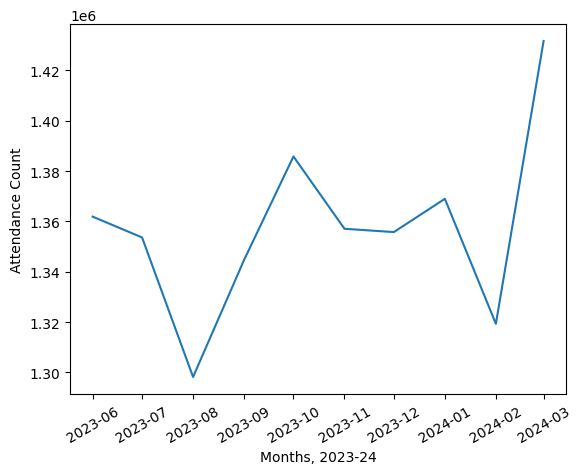

In [54]:
plot_linechart(plot_data, 'A&E attendances Type 1')

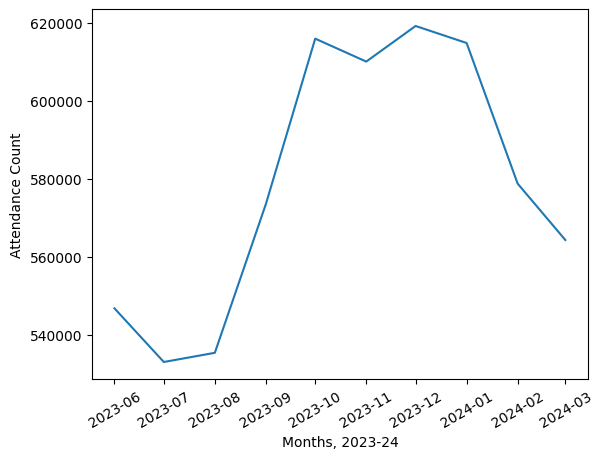

In [55]:
plot_linechart(plot_data, 'Attendances over 4hrs Type 1')

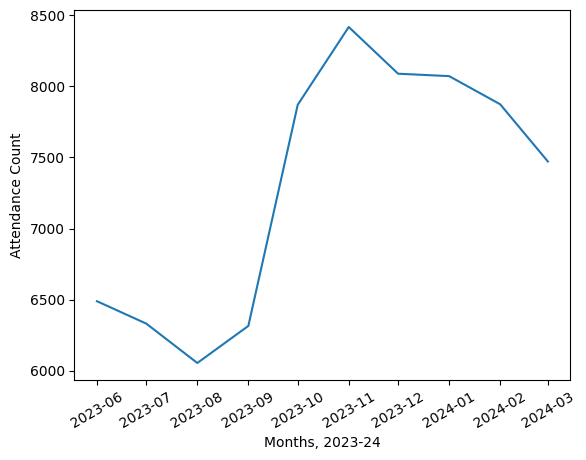

In [56]:
plot_linechart(plot_data, 'Attendances over 4hrs Booked Appointments Type 1')

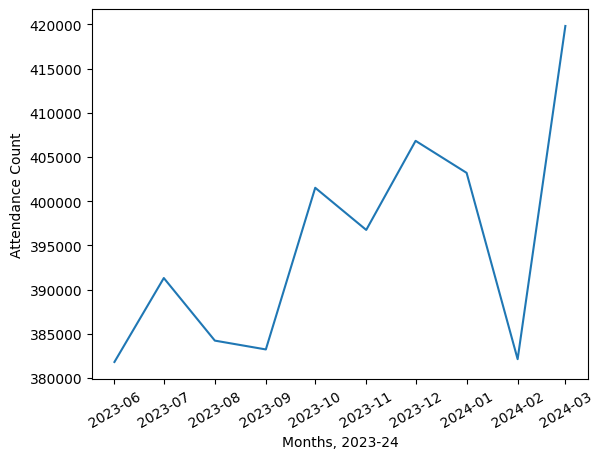

In [57]:
plot_linechart(plot_data, 'Emergency admissions via A&E - Type 1')

In [46]:
corr_data = plot_data.select_dtypes(include='number').drop(['Unnamed: 0'], axis=1)
corr = corr_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,A&E attendances Type 1,A&E attendances Type 2,A&E attendances Other A&E Department,A&E attendances Booked Appointments Type 1,A&E attendances Booked Appointments Type 2,A&E attendances Booked Appointments Other Department,Attendances over 4hrs Type 1,Attendances over 4hrs Type 2,Attendances over 4hrs Other Department,Attendances over 4hrs Booked Appointments Type 1,Attendances over 4hrs Booked Appointments Type 2,Attendances over 4hrs Booked Appointments Other Department,Patients who have waited 4-12 hs from DTA to admission,Patients who have waited 12+ hrs from DTA to admission,Emergency admissions via A&E - Type 1,Emergency admissions via A&E - Type 2,Emergency admissions via A&E - Other A&E department,Other emergency admissions
A&E attendances Type 1,1.000000,0.459176,0.779629,0.692867,-0.035658,0.526197,0.270049,0.080780,0.329892,0.346356,-0.424183,-0.009860,0.291249,0.344389,0.805579,0.412125,0.069883,0.415728
A&E attendances Type 2,0.459176,1.000000,0.708000,0.241619,-0.718589,0.123536,-0.577435,0.404740,-0.254960,-0.349554,0.168736,0.148285,-0.520273,-0.294819,0.088917,0.671521,0.315572,0.105283
A&E attendances Other A&E Department,0.779629,0.708000,1.000000,0.572517,-0.186618,0.618281,-0.204235,0.207228,0.196110,-0.028497,-0.241545,0.058441,-0.116190,0.100603,0.548075,0.469277,0.151991,0.225927
A&E attendances Booked Appointments Type 1,0.692867,0.241619,0.572517,1.000000,0.148483,0.770934,0.425719,0.314798,0.474735,0.732721,0.085393,-0.267538,0.565503,0.654104,0.782252,0.702210,-0.188856,0.714568
A&E attendances Booked Appointments Type 2,-0.035658,-0.718589,-0.186618,0.148483,1.000000,0.192892,0.435320,-0.466357,0.265916,0.340124,-0.480696,-0.144470,0.471679,0.255902,0.377406,-0.457841,-0.202187,-0.199301
A&E attendances Booked Appointments Other Department,0.526197,0.123536,0.618281,0.770934,0.192892,1.000000,0.344946,0.216099,0.410362,0.550894,-0.032762,-0.290286,0.491135,0.708778,0.706728,0.413300,-0.057482,0.651220
Attendances over 4hrs Type 1,0.270049,-0.577435,-0.204235,0.425719,0.435320,0.344946,1.000000,-0.021220,0.647741,0.878000,-0.249160,-0.149226,0.932231,0.855671,0.464541,-0.053260,-0.505141,0.568834
Attendances over 4hrs Type 2,0.080780,0.404740,0.207228,0.314798,-0.466357,0.216099,-0.021220,1.000000,0.388642,0.273367,0.376335,0.128677,-0.128024,0.169274,-0.178113,0.612207,0.025774,0.271212
Attendances over 4hrs Other Department,0.329892,-0.254960,0.196110,0.474735,0.265916,0.410362,0.647741,0.388642,1.000000,0.663744,-0.221539,0.292982,0.489153,0.593606,0.204406,0.018870,-0.346384,0.379111
Attendances over 4hrs Booked Appointments Type 1,0.346356,-0.349554,-0.028497,0.732721,0.340124,0.550894,0.878000,0.273367,0.663744,1.000000,0.054248,-0.262202,0.886717,0.883865,0.554935,0.332871,-0.399841,0.737136
